In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
U=[5,20,25,50]
DF = pd.read_csv(f'Arq{U[0]}.csv')
DF
N=len(DF)

OMA = DF['OMA Sum rate']
NOMA = DF['Architecture Sum rate']
FNOMA = DF['Fixed NOMA Sum rate']

m_OMA = np.mean(OMA)
m_NOMA = np.mean(NOMA)
m_FNOMA = np.mean(FNOMA)
s_OMA = np.std(OMA)
s_NOMA = np.std(NOMA)
s_FNOMA = np.std(FNOMA)
#plt.figure(figsize=(16,9))
labels = ['AH-NOMA', 'OMA', 'Fixed NOMA']
x_pos = np.arange(len(labels))
CTEs = [m_NOMA, m_OMA, m_FNOMA ]
error = [s_NOMA, s_OMA, s_FNOMA]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Total Sum Rate (bps/Hz)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.pdf')
plt.show()

print(m_NOMA)
print(m_FNOMA)
print(m_OMA)
print(s_NOMA)
print(s_FNOMA)
print(s_OMA)


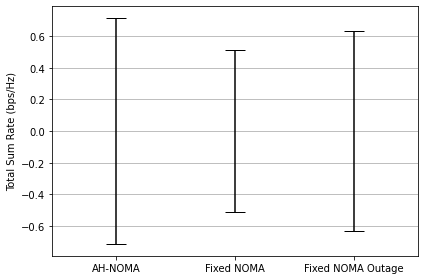

In [3]:

NOMA = DF['NOMA Pairs']
FNOMA = DF['Fixed NOMA Pairs']
ONOMA = DF['Fixed NOMA Outage']


m_NOMA = np.floor(np.mean(NOMA))
m_FNOMA = np.floor(np.mean(FNOMA))
m_ONOMA = np.floor(np.mean(ONOMA))


s_NOMA = np.std(NOMA)
s_FNOMA = np.std(FNOMA)
s_ONOMA = np.std(ONOMA)
#plt.figure(figsize=(16,9))
labels = ['AH-NOMA', 'Fixed NOMA', 'Fixed NOMA Outage']
x_pos = np.arange(len(labels))
CTEs = [m_NOMA, m_FNOMA,m_ONOMA ]
error = [s_NOMA, s_FNOMA, s_ONOMA]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Total Sum Rate (bps/Hz)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Pairs_N_plot_with_error_bars.pdf')
plt.show()

5
2.821


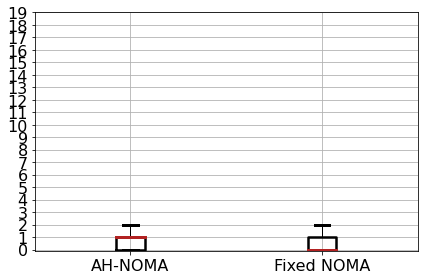

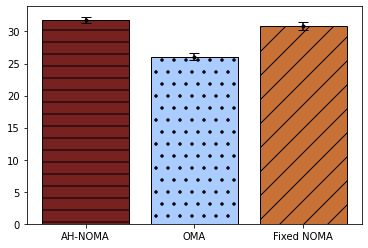

20
2.821


<Figure size 432x288 with 0 Axes>

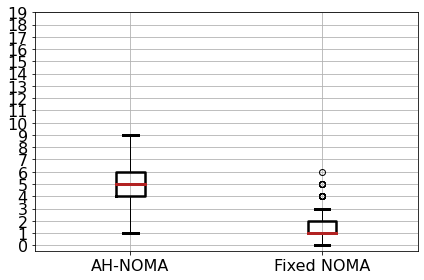

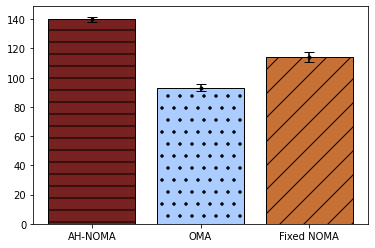

25
2.821


<Figure size 432x288 with 0 Axes>

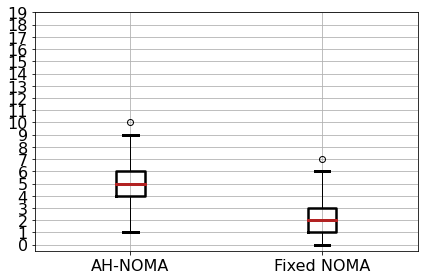

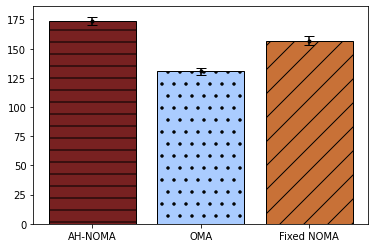

50
2.821


<Figure size 432x288 with 0 Axes>

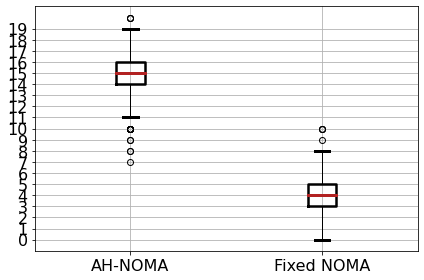

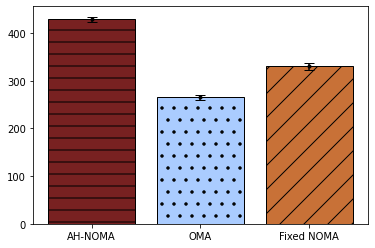

<Figure size 432x288 with 0 Axes>

In [4]:
for i in range(len(U)):
    DF = pd.read_csv(f'Arq{U[i]}.csv')
    N=len(DF)

    fig1, ax = plt.subplots()
    NOMA = DF['NOMA Pairs']
    FNOMA = DF['Fixed NOMA Pairs']
    ONOMA = DF['Fixed NOMA Outage']
    labels = ['AH-NOMA', 'Fixed NOMA']
    x_pos = np.arange(len(labels))
    data = [NOMA, FNOMA]
    boxprops = dict( linewidth=2.5)
    medianprops = dict(linewidth=3, color='firebrick')
    capprops = dict(linewidth=3)
    meanprops = dict( linewidth=3)
    ax.boxplot(data,boxprops=boxprops,medianprops=medianprops,capprops=capprops)

    ax.set_xticklabels(labels,fontsize=16)
    plt.yticks(np.arange(0,20),fontsize=16)
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(f'{U[i]}Users_Pairs.pdf')
    print(U[i])
    OMA = DF['OMA Sum rate']
    NOMA = DF['Architecture Sum rate']
    FNOMA = DF['Fixed NOMA Sum rate']
    m_OMA = np.mean(OMA)
    m_NOMA = np.mean(NOMA)
    m_FNOMA = np.mean(FNOMA)
    s_OMA = np.std(OMA)
    s_NOMA = np.std(NOMA)
    s_FNOMA = np.std(FNOMA)
    labels = ["AH-NOMA", "OMA",	"Fixed NOMA"]
    averages= [m_NOMA,	m_OMA,	m_FNOMA]
    STDs = [s_NOMA, s_OMA, s_FNOMA]
    z_value = 2.821#np.divide(STDs,np.sqrt(N))
    print(z_value)
    confidence_int = [STDs[i]/np.sqrt(N)*z_value for i in range(0,3)]
    fig, ax = plt.subplots()
    hatches = ["-", ".", "/"]
    colors = ["#782121", "#AACCFF", "#C87137"]
    for i in range(0,3):
    	ax.bar(i, averages[i], edgecolor='black', hatch=hatches[i], color=colors[i])
    	ax.errorbar(i, averages[i], yerr=confidence_int[i], color='black', marker=".", capsize=5)
		# for cap in caps:
		# 	cap.set_markeredgewidth(1)
    ax.set_xticks([i for i in range(0,3)])
    ax.set_xticklabels(labels)
    plt.show()
    plt.tight_layout()
    plt.savefig(f'{i}Users_Sum_Rate.svg')


In [5]:
def dados(tabela):
    DF = tabela
    OMA = DF['OMA Sum rate']
    NOMA = DF['Architecture Sum rate']
    BL_NOMA = DF['Baseline Sum rate']
    FNOMA = DF['Fixed NOMA Sum rate']
    m_OMA = np.mean(OMA)
    m_NOMA = np.mean(NOMA)
    m_BL_NOMA = np.mean(BL_NOMA)
    m_FNOMA = np.mean(FNOMA)
    s_OMA = np.std(OMA)
    s_NOMA = np.std(NOMA)
    s_BL_NOMA = np.std(BL_NOMA)
    s_FNOMA = np.std(FNOMA)

    return [m_OMA, m_NOMA, m_FNOMA,s_OMA,s_NOMA,s_FNOMA, m_BL_NOMA,s_BL_NOMA]

def pares(tabela):
    DF = tabela
    NOMA = DF['NOMA Pairs']
    FNOMA = DF['Fixed NOMA Pairs']
    BLNOMA = DF['Baseline NOMA Pairs']


    return [NOMA, FNOMA, BLNOMA]

2.821


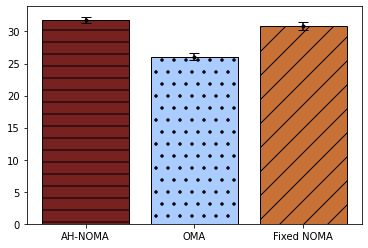

In [6]:
import matplotlib.pyplot as plt
from math import sqrt


	

DF = pd.read_csv('Arq5.csv')
N=len(DF)	
OMA = DF['OMA Sum rate']
NOMA = DF['Architecture Sum rate']
FNOMA = DF['Fixed NOMA Sum rate']
m_OMA = np.mean(OMA)
m_NOMA = np.mean(NOMA)
m_FNOMA = np.mean(FNOMA)
s_OMA = np.std(OMA)
s_NOMA = np.std(NOMA)
s_FNOMA = np.std(FNOMA)
labels = ["AH-NOMA", "OMA",	"Fixed NOMA"]
averages= [m_NOMA,	m_OMA,	m_FNOMA]
STDs = [s_NOMA, s_OMA, s_FNOMA]
z_value = 2.821#np.divide(STDs,np.sqrt(N))
print(z_value)
confidence_int = [STDs[i]/sqrt(N)*z_value for i in range(0,3)]
fig, ax = plt.subplots()
hatches = ["-", ".", "/"]
colors = ["#782121", "#AACCFF", "#C87137"]
for i in range(0,3):
	ax.bar(i, averages[i], edgecolor='black', hatch=hatches[i], color=colors[i])
	ax.errorbar(i, averages[i], yerr=confidence_int[i], color='black', marker=".", capsize=5)
	# for cap in caps:
	# 	cap.set_markeredgewidth(1)
ax.set_xticks([i for i in range(0,3)])
ax.set_xticklabels(labels)
#plt.show()
#plt.tight_layout()
plt.savefig("5Users_Sum_Rate.svg", orientation='portrait', format="svg",
        transparent=True)

In [1]:
#DF10 = pd.read_csv('Arq10.csv')
#DF20 = pd.read_csv('Arq20.csv')#pd.read_csv('Arq20.csv')
#DF30 = pd.read_csv('Arq30.csv')#pd.read_csv('Arq30.csv')
#DF40 = pd.read_csv('Arq40.csv')#pd.read_csv('Arq40.csv')
#DF50 = pd.read_csv('Arq50.csv')#pd.read_csv('Arq50.csv')
DF10 = pd.read_csv('FArq10.csv')
DF20 = pd.read_csv('FArq21.csv')#pd.read_csv('Arq20.csv')
DF30 = pd.read_csv('FArq30.csv')#pd.read_csv('Arq30.csv')
DF40 = pd.read_csv('Arq40.csv')#pd.read_csv('Arq40.csv')
DF50 = pd.read_csv('Arq50.csv')#pd.read_csv('Arq50.csv')
N=len(DF20)-1
plt.rcParams['text.usetex'] = True
z_value = 2.821
labels = ['10 Users', '20 Users', '30 Users', '40 Users', '50 Users']
U10 = dados(DF10)
U20 = dados(DF20)
U30 = dados(DF30)
U40 = dados(DF40)
U50 = dados(DF50)

averages_AH_NOMA = [U10[1],U20[1],U30[1],U40[1],U50[1]]
averages_OMA = [U10[0],U20[0],U30[0],U40[0],U50[0]]
averages_Fixed_NOMA = [U10[2],U20[2],U30[2],U40[2],U50[2]]
averages_BL_NOMA = [U10[6],U20[6],U30[6],U40[6],U50[6]]

std_AH_NOMA = [U10[4],U20[4],U30[4],U40[4],U50[4]]
confidence_int_AH_NOMA = [std_AH_NOMA[i]/np.sqrt(N)*z_value for i in range(len(std_AH_NOMA))]
std_OMA = [U10[3],U20[3],U30[3],U40[3],U50[3]]
confidence_int_OMA= [std_OMA[i]/np.sqrt(N)*z_value for i in range(len(std_OMA))]
std_Fixed_NOMA = [U10[5],U20[5],U30[5],U40[5],U50[5]]
confidence_int_Fixed_NOMA= [std_Fixed_NOMA[i]/np.sqrt(N)*z_value for i in range(len(std_Fixed_NOMA))]
std_BL_NOMA = [U10[7],U20[7],U30[7],U40[7],U50[7]]
confidence_int_BL_NOMA= [std_Fixed_NOMA[i]/np.sqrt(N)*z_value for i in range(len(std_BL_NOMA))]

x = np.arange(3*len(labels)/2,step=3/2)  # the label locations
width = 0.24  # the width of the bars

plt.figure(figsize=(16,9))
rects1 = plt.bar(x - (0.65*width), averages_AH_NOMA, width, edgecolor='black', label='AH-NOMA',yerr=confidence_int_AH_NOMA,align='center')
rects2 = plt.bar(x + (2*width) , averages_OMA, width, edgecolor='black', label='OMA [12]',yerr=confidence_int_OMA,align='center')
rects3 = plt.bar(x + (0.65*width), averages_Fixed_NOMA, width, edgecolor='black', label=r'Marcano \textit{et al.} [10]',yerr=confidence_int_Fixed_NOMA,align='center')
rects4 = plt.bar(x - (2*width), averages_BL_NOMA, width, edgecolor='black', label='Baseline',yerr=confidence_int_BL_NOMA,align='center',color = 'gray')
plt.ylim(0,500)
plt.ylabel('bps/Hz',fontsize=26)
plt.xticks(x,labels=labels,fontsize=26)
plt.yticks(fontsize=26)

plt.legend(loc=0,fontsize=26)
plt.bar_label(rects4,labels=['%.2f' % e for e in averages_BL_NOMA ],fontweight='bold', padding=0,fontsize=22,rotation=60)
plt.bar_label(rects1,labels=['%.2f' % e for e in averages_AH_NOMA ],fontweight='bold',padding=0,fontsize=22,rotation=60)
plt.bar_label(rects2,labels=['%.2f' % e for e in averages_OMA ],fontweight='bold', padding=0,fontsize=22,rotation=60)
plt.bar_label(rects3,labels=['%.2f' % e for e in averages_Fixed_NOMA ], fontweight='bold',padding=0,fontsize=22, rotation=60)

#plt.autoscale(enable=True, axis='x', tight=True)
#plt.tight_layout()
plt.tight_layout()
plt.savefig('1Sum_Rate_Comparison.pdf')

NameError: name 'pd' is not defined

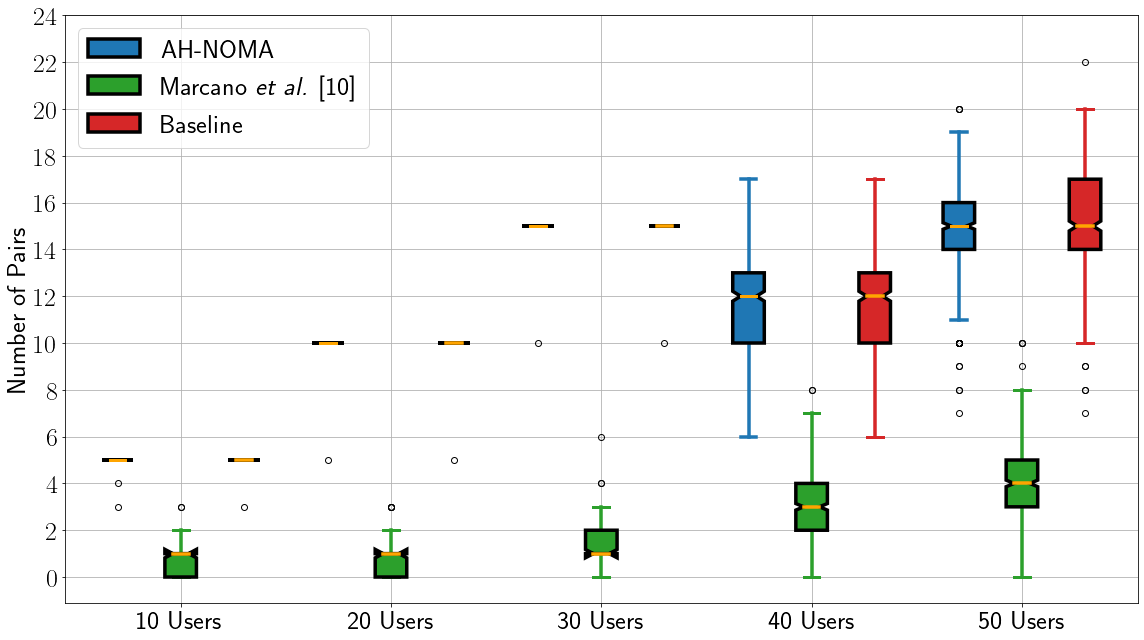

In [14]:
ticks = ['10 Users', '20 Users', '30 Users', '40 Users', '50 Users']
U10 = pares(DF10)
U20 = pares(DF20)
U30 = pares(DF30)
U40 = pares(DF40)
U50 = pares(DF50)
NOMA = [U10[0],U20[0],U30[0],U40[0],U50[0]]
FNOMA = [U10[1],U20[1],U30[1],U40[1],U50[1]]
BL_NOMA = [U10[2],U20[2],U30[2],U40[2],U50[2]]
fig1, ax = plt.subplots(figsize=(16,9))
labels = ['AH-NOMA', 'Fixed NOMA']
x_pos = np.arange(len(labels))
data = [U10[0],U20[0],U30[0],U40[0],U50[0],U10[1],U20[1],U30[1],U40[1],U50[1]]
boxprops = dict(facecolor='tab:blue', linewidth=3.5, color='black')
medianprops = dict(linestyle='-',linewidth=3, color='orange')
capprops = dict(linewidth=3.5, color='tab:blue')
meanprops = dict( linewidth=3, color='tab:blue')
whiskerprops=dict(linewidth=3.5, color='tab:blue')
bp1=plt.boxplot(NOMA,boxprops=boxprops,medianprops=medianprops,capprops=capprops,whiskerprops=whiskerprops,positions=np.array(range(len(NOMA)))*2.0-0.6,widths=0.3,notch=True, patch_artist=True)
boxprops = dict( linewidth=3.5, color='black',facecolor='tab:green')
medianprops = dict(linestyle='-',linewidth=3.5, color='orange')
capprops = dict(linewidth=3, color='tab:green')
meanprops = dict(linewidth=3, color='tab:green')
whiskerprops=dict(color='tab:green',linewidth=3.5)
bp2=plt.boxplot(FNOMA,boxprops=boxprops,medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,positions=np.array(range(len(FNOMA)))*2.0,widths=0.3,notch=True, patch_artist=True)


boxprops = dict( linewidth=3.5, color='black',facecolor='tab:red')
medianprops = dict(linestyle='-',linewidth=3.5, color='orange')
capprops = dict(linewidth=3, color='tab:red')
meanprops = dict(linewidth=3, color='tab:red')
whiskerprops=dict(color='tab:red',linewidth=3.5)
bp3=plt.boxplot(BL_NOMA,boxprops=boxprops,medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops,positions=np.array(range(len(FNOMA)))*2.0+0.6,widths=0.3,notch=True, patch_artist=True)
plt.xticks(range(0, len(ticks) * 2, 2), ticks,fontsize=26)
#ax.set_xticklabels(labels,fontsize=16)
plt.yticks(np.arange(0,25,step=2),fontsize=26)
plt.ylabel('Number of Pairs',fontsize=26)
plt.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]],[r'AH-NOMA', r'Marcano \textit{et al.} [10]',r'Baseline'], fontsize=26,loc=0)
ax.grid(True)
plt.tight_layout()
plt.savefig('1Pairs_Comparison.pdf')

In [15]:
len(NOMA)

5